# Colorado Fourteener Project

## Introduction

This goal of this project is to analyze data about the colorado mountains nicknamed the 'Colorado Fourteeners', particularly focussing on the number of visitors to the peaks and the factors which affect this.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of elevation of the fourteeners?
- Which fourteeners are the most popular?
- Does elevation, elevation gain, distance, isolation or difficulty affect the foot traffic of the fourteeners?

#### Data sources:

This data was found on the website: https://www.kaggle.com/datasets/mikeshout/14erpeaks

The peaks, ranges, elevations, prominences, isolations, latitudes, and longitudes were orginally sourced from the Colorado Fourteener Wikipedia page here. Some data elements were corrected after cross referencing with information from peakbagger.com

The route information was scraped from the www.outtherecolorado.com web site

The traffic fields are from a report titled Estimated Hiking Use on Colorado’s 14ers composed by the Colorado Fourteener Initiative available here

The photos are hosted on www.14ers.com/

-----
## Context

This tidy dataset lists mountain peaks rising to an elevation greater than 14,000 ft (4,267 meters) located in the state of Colorado, USA.

The term fourteener refers to mountain peaks with an elevation greater than 14,000 feet (4,267 meters) and a significant prominence. The prominence is generally agreed to be at least 300 feet higher than the saddle that connecting it to a neighboring peak.

In Colorado, and in this dataset, there are 58 peaks over 14,000 feet. Five of those peaks do not meet the prominence rule, so you can filter the list down to the commonly accepted list of 53 Colorado fourteeners.

-----
## The Data

#### Import Python Modules:

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Import Data:

In [218]:
all_peaks = pd.read_csv('14er.csv', encoding='latin-1')
all_peaks.head(10)

,ID,Mountain Peak,Mountain Range,Elevation_ft,fourteener,Prominence_ft,Isolation_mi,Lat,Long,Standard Route,Distance_mi,Elevation Gain_ft,Difficulty,Traffic Low,Traffic High,photo
0,1,Mount Elbert,Sawatch Range,14440,Y,9093,670.00,39.1178,-106.4454,Northeast Ridge,9.50,4700,Class 1,20000,25000,https://www.14ers.com/photos/mtelbert/peakphot...
1,2,Mount Massive,Sawatch Range,14428,Y,1961,5.06,39.1875,-106.4757,East Slopes,14.50,4500,Class 2,7000,10000,https://www.14ers.com/photos/mtmassive/peakpho...
2,3,Mount Harvard,Sawatch Range,14421,Y,2360,14.93,38.9244,-106.3207,South Slopes,14.00,4600,Class 2,5000,7000,https://www.14ers.com/photos/harvardgroup/peak...
3,4,Blanca Peak,Sangre de Cristo Range,14351,Y,5326,103.40,37.5775,-105.4856,Northwest Ridge,17.00,6500,Hard Class 2,1000,3000,https://www.14ers.com/photos/blancagroup/peakp...
4,5,La Plata Peak,Sawatch Range,14343,Y,1836,6.28,39.0294,-106.4729,Northwest Ridge,9.25,4500,Class 2,5000,7000,https://www.14ers.com/photos/laplatapeak/peakp...
5,6,Uncompahgre Peak,San Juan Mountains,14321,Y,4277,85.10,38.0717,-107.4621,South Ridge,7.50,3000,Class 2,3000,5000,https://www.14ers.com/photos/uncompahgrepeak/p...
6,7,Crestone Peak,Sangre de Cristo Range,14300,Y,4554,27.40,37.9669,-105.5855,South Face,14.00,5700,Class 3,1000,3000,https://www.14ers.com/photos/crestonegroup/pea...
7,8,Mount Lincoln,Mosquito Range,14293,Y,3862,22.60,39.3515,-106.1116,West Ridge,6.00,2600,Class 2,15000,20000,https://www.14ers.com/photos/lincolngroup/peak...
8,9,Castle Peak,Elk Mountains,14279,Y,2365,20.90,39.0097,-106.8614,Northeast Ridge,13.50,4600,Hard Class 2,1000,3000,https://www.14ers.com/photos/castlegroup/peakp...
9,10,Grays Peak,Front Range,14278,Y,2770,25.00,39.6339,-105.8176,North Slopes,8.00,3000,Class 1,25000,30000,https://www.14ers.com/photos/graystorreys/peak...


#### Content:

There are 58 rows (plus a header) of data, each representing a mountain peak. There are fifteen variables describing each peak.

- ID – A unique Identifier for each row
- Mountain Peak – The name of the peak
- Mountain Range – the name of the primary mountain range the peak is a member of
- Elevation_ft – The peak elevation in feet
- Fourteener – An indicator if the peak is considered a fourteener and includes a value of Y or N
- Prominence_ft – How much higher the peak is in feet from the next highest point
- Isolation_mi – the distance in miles from the nearest point of the same or higher elevation
- Lat - The latitudinal coordinate in decimal form
- Long - The longitudinal coordinate in decimal form
- Standard Route – the name of the most commonly used hiking/climbing route to the peak
- Distance_mi – The distance of the standard route in miles
- Elevation Gain_ft – The elevation gain of the standard route in feet
- Difficulty – The Yosemite Decimal System difficulty rating, a value ranging from Class 1 (easiest) to Class 5 (most difficult)
- Traffic Low – The low range of estimated visits in the year 2017
- Traffic High – The high range of estimated visits in the year 2017
- photo – A URL to a photo of the peak


#### Preparing the Data:
As five of the peaks in the dataset, do not meet the prominence rule for the Colorado fourteeners, another dataframe will be created without these five peaks for use in the analysis:

In [368]:
# Remove peaks that do not qualify as fourteeners and create new dataframe
fourteeners = all_peaks[all_peaks['fourteener'] == 'Y']
fourteeners.head()

,ID,Mountain Peak,Mountain Range,Elevation_ft,fourteener,Prominence_ft,Isolation_mi,Lat,Long,Standard Route,Distance_mi,Elevation Gain_ft,Difficulty,Traffic Low,Traffic High,photo
0,1,Mount Elbert,Sawatch Range,14440,Y,9093,670.00,39.1178,-106.4454,Northeast Ridge,9.50,4700,Class 1,20000,25000,https://www.14ers.com/photos/mtelbert/peakphot...
1,2,Mount Massive,Sawatch Range,14428,Y,1961,5.06,39.1875,-106.4757,East Slopes,14.50,4500,Class 2,7000,10000,https://www.14ers.com/photos/mtmassive/peakpho...
2,3,Mount Harvard,Sawatch Range,14421,Y,2360,14.93,38.9244,-106.3207,South Slopes,14.00,4600,Class 2,5000,7000,https://www.14ers.com/photos/harvardgroup/peak...
3,4,Blanca Peak,Sangre de Cristo Range,14351,Y,5326,103.40,37.5775,-105.4856,Northwest Ridge,17.00,6500,Hard Class 2,1000,3000,https://www.14ers.com/photos/blancagroup/peakp...
4,5,La Plata Peak,Sawatch Range,14343,Y,1836,6.28,39.0294,-106.4729,Northwest Ridge,9.25,4500,Class 2,5000,7000,https://www.14ers.com/photos/laplatapeak/peakp...


For analysis purposes, we will compare elevation, elevation gain, distance, isolation or difficulty for each peak to the value labeled as 'Traffic Median' as a quantitative value for the number of visits for each of the fourteeners. The column 'Traffic Median' will be calculated as the median value of 'Traffic Low' and 'Traffic High', the low and high range, respectively, of estimated visits in the year 2017. The median value should give a reasonable estimate for analysis purposes.

In [372]:
# Function to find the median of the Traffic High and Traffic Low columns
def find_median(dataframe, column_1, column_2):
    i=0
    for i in range(len(dataframe)):
        median = 1.0*(dataframe.loc[i, column_1] + dataframe.loc[i, column_2])/2
        dataframe.loc[i,'Traffic Median'] = median
        i += 1
    return dataframe.head()


find_median(fourteeners, 'Traffic High', 'Traffic Low')

,ID,Mountain Peak,Mountain Range,Elevation_ft,fourteener,Prominence_ft,Isolation_mi,Lat,Long,Standard Route,Distance_mi,Elevation Gain_ft,Difficulty,Traffic Low,Traffic High,photo,Traffic Median
0,1,Mount Elbert,Sawatch Range,14440,Y,9093,670.00,39.1178,-106.4454,Northeast Ridge,9.50,4700,Class 1,20000,25000,https://www.14ers.com/photos/mtelbert/peakphot...,22500.0
1,2,Mount Massive,Sawatch Range,14428,Y,1961,5.06,39.1875,-106.4757,East Slopes,14.50,4500,Class 2,7000,10000,https://www.14ers.com/photos/mtmassive/peakpho...,8500.0
2,3,Mount Harvard,Sawatch Range,14421,Y,2360,14.93,38.9244,-106.3207,South Slopes,14.00,4600,Class 2,5000,7000,https://www.14ers.com/photos/harvardgroup/peak...,6000.0
3,4,Blanca Peak,Sangre de Cristo Range,14351,Y,5326,103.40,37.5775,-105.4856,Northwest Ridge,17.00,6500,Hard Class 2,1000,3000,https://www.14ers.com/photos/blancagroup/peakp...,2000.0
4,5,La Plata Peak,Sawatch Range,14343,Y,1836,6.28,39.0294,-106.4729,Northwest Ridge,9.25,4500,Class 2,5000,7000,https://www.14ers.com/photos/laplatapeak/peakp...,6000.0


-----
## Analysis

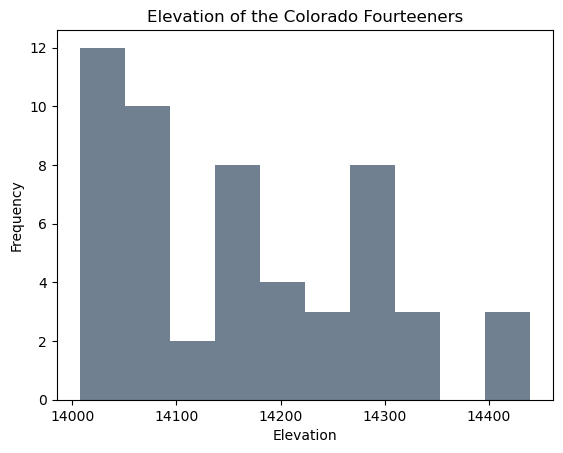

In [225]:
plt.hist(fourteeners['Elevation_ft'], color = 'slategray')
plt.title('Elevation of the Colorado Fourteeners')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.show()

The distribution of elevation across the peaks is right skewed meaning a large proportion of peaks are on the smaller end of the spectrum.

In [226]:
most_popular_fourteeners = fourteeners[fourteeners['Traffic Median'] > 20000]
most_popular_fourteeners

,ID,Mountain Peak,Mountain Range,Elevation_ft,fourteener,Prominence_ft,Isolation_mi,Lat,Long,Standard Route,Distance_mi,Elevation Gain_ft,Difficulty,Traffic Low,Traffic High,photo,Traffic Median
0,1,Mount Elbert,Sawatch Range,14440,Y,9093,670.00,39.1178,-106.4454,Northeast Ridge,9.50,4700,Class 1,20000,25000,https://www.14ers.com/photos/mtelbert/peakphot...,22500.0
9,10,Grays Peak,Front Range,14278,Y,2770,25.00,39.6339,-105.8176,North Slopes,8.00,3000,Class 1,25000,30000,https://www.14ers.com/photos/graystorreys/peak...,27500.0
11,12,Torreys Peak,Front Range,14275,Y,560,0.65,39.6428,-105.8212,South Slopes,8.00,3000,Class 2,25000,30000,https://www.14ers.com/photos/graystorreys/peak...,27500.0
12,13,Quandary Peak,Mosquito Range,14271,Y,1125,3.16,39.3973,-106.1064,East Ridge,6.75,3450,Class 1,20000,25000,https://www.14ers.com/photos/quandarypeak/peak...,22500.0
37,38,Mount Bierstadt,Front Range,14065,Y,720,1.12,39.5826,-105.6688,West Slopes,7.00,2850,Class 2,35000,40000,https://www.14ers.com/photos/evansgroup/peakph...,37500.0
44,45,Mount Sherman,Mosquito Range,14043,Y,850,8.06,39.2250,-106.1699,Southwest Ridge,5.25,2100,Class 2,20000,25000,https://www.14ers.com/photos/mtsherman/peakpho...,22500.0


In [227]:
print('The most popular fourteener is: ' + fourteeners['Mountain Peak'][fourteeners['Traffic Median'] == 37500.0])

37    The most popular fourteener is: Mount Bierstadt
Name: Mountain Peak, dtype: object


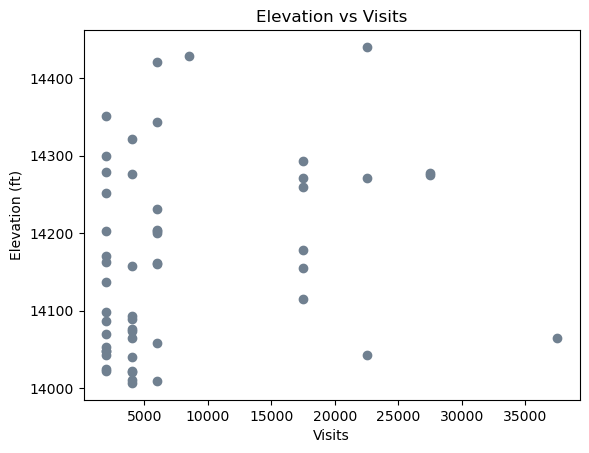

In [240]:
plt.scatter(fourteeners['Traffic Median'], fourteeners['Elevation_ft'], color = 'slategray')
plt.title('Elevation vs Visits')
plt.xlabel('Visits')
plt.ylabel('Elevation (ft)')
plt.show()

In [374]:
# calculate pearson correlation coefficient
elevation_visits_r = np.corrcoef(fourteeners['Traffic Median'], fourteeners['Elevation_ft'])
elevation_visits_r[0,1]

0.2575102212079854

From the scatter plot, there appears to be no correlation between peak elevation and visits in 2017. The pearson correlation coeffient is 0.258 (3 dp.) which shows a very weak positive correlation. This is probably due to the clustering of points in the lower left of the scatter plot implying that peaks with lower elavation tend to get visited less. Due to the very weak correlation, very little can be concluded from this comparison.

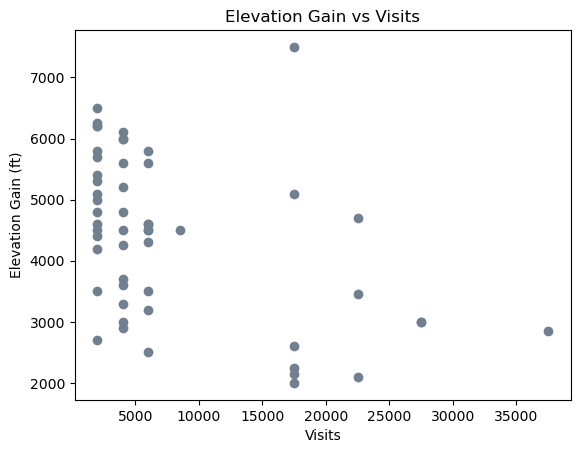

In [242]:
plt.scatter(fourteeners['Traffic Median'], fourteeners['Elevation Gain_ft'], color = 'slategray')
plt.title('Elevation Gain vs Visits')
plt.xlabel('Visits')
plt.ylabel('Elevation Gain (ft)')
plt.show()

In [376]:
# calculate pearson correlation coefficient
elevation_gain_visits_r = np.corrcoef(fourteeners['Traffic Median'], fourteeners['Elevation Gain_ft'])
elevation_gain_visits_r[0,1]

-0.45079057110470133

The scatter plot shows a weak negative correlation between the elevation gain along a route to the peak and the number of visits to that peak. The pearson correlation coefficeint of -0.451 (3 dp.) supports this conclusion. This is what I expected to see as more elevation gain along a route would imply a more difficult route and therefore less visitors. I would like to investigate this theory further.

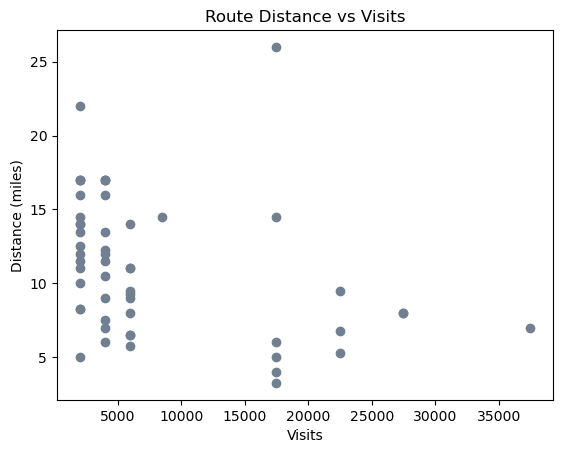

In [339]:
plt.scatter(fourteeners['Traffic Median'], fourteeners['Distance_mi'], color = 'slategray')
plt.title('Route Distance vs Visits')
plt.xlabel('Visits')
plt.ylabel('Distance (miles)')
plt.show()

In [378]:
# calculate pearson correlation coefficient
distance_visits_r = np.corrcoef(fourteeners['Traffic Median'], fourteeners['Distance_mi'])
distance_visits_r[0,1]

-0.3421406524778482

The scatter plot shows a weak negative correlation between the distance along a route to the peak and the number of visits to that peak. The pearson correlation coefficeint of -0.342 (3 dp.) supports this conclusion. The correlation between distance and number of visits is wekaer than between elevation gain Again, a longer distance route would imply a more difficulty and therefore mean less visitors. I would like to investigate this similar theory also.

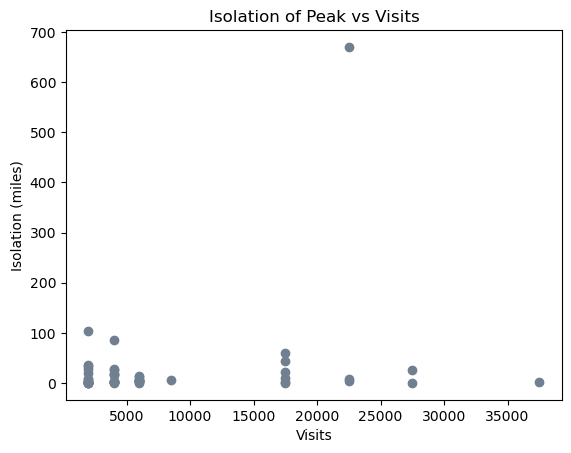

In [341]:
plt.scatter(fourteeners['Traffic Median'], fourteeners['Isolation_mi'], color = 'slategray')
plt.title('Isolation of Peak vs Visits')
plt.xlabel('Visits')
plt.ylabel('Isolation (miles)')
plt.show()

In [380]:
# calculate pearson correlation coefficient
isolation_visits_r = np.corrcoef(fourteeners['Traffic Median'], fourteeners['Isolation_mi'])
isolation_visits_r[0,1]

0.23340030073364404

From this scatter plot, there appears to be no correlation between the isolation of a peak and the number of visits in 2017. The pearson correlation coeffient is 0.233 (3 dp.) which shows a very weak positive correlation. Due to the very weak correlation, very little can be concluded from this comparison.

In [260]:
difficulty_ratings = fourteeners['Difficulty'].unique()
difficulty_ratings

array(['Class 1', 'Class 2', 'Hard Class 2', 'Class 3', 'Class 4',
       'Easy Class 3', 'Hard Class 3'], dtype=object)

In [262]:
difficulty_ratings_ordered = ['Class 1', 'Class 2', 'Hard Class 2', 'Easy Class 3', 'Class 3', 'Hard Class 3', 'Class 4']
difficulty_ratings_ordered

['Class 1',
 'Class 2',
 'Hard Class 2',
 'Easy Class 3',
 'Class 3',
 'Hard Class 3',
 'Class 4']

In [296]:
class_1 = fourteeners[fourteeners["Difficulty"] == "Class 1"]["Traffic Median"].sum()
class_2 = fourteeners[fourteeners["Difficulty"] == "Class 2"]["Traffic Median"].sum()
hard_class_2 = fourteeners[fourteeners["Difficulty"] == "Hard Class 2"]["Traffic Median"].sum()
easy_class_3 = fourteeners[fourteeners["Difficulty"] == "Easy Class 3"]["Traffic Median"].sum()
class_3 = fourteeners[fourteeners["Difficulty"] == "Class 3"]["Traffic Median"].sum()
hard_class_3 = fourteeners[fourteeners["Difficulty"] == "Hard Class 3"]["Traffic Median"].sum()
class_4 = fourteeners[fourteeners["Difficulty"] == "Class 4"]["Traffic Median"].sum()
difficulty_visits = [class_1, class_2, hard_class_2, easy_class_3, class_3, hard_class_3, class_4]
difficulty_visits

[100000.0, 252000.0, 12000.0, 8000.0, 33500.0, 2000.0, 12000.0]

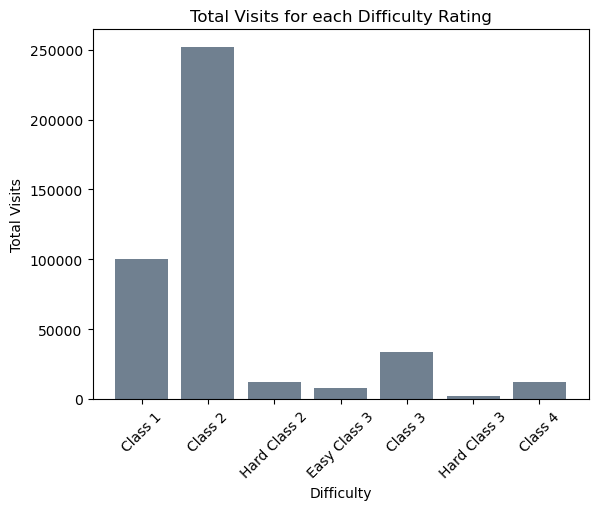

In [324]:
plt.bar(range(len(difficulty_visits)), difficulty_visits, color = 'slategray')
ax = plt.subplot()
plt.title('Total Visits for each Difficulty Rating')
plt.xlabel('Difficulty')
plt.ylabel('Total Visits')
ax.set_xticks(range(len(difficulty_visits)))
ax.set_xticklabels(difficulty_ratings_ordered, rotation = 45)
plt.show()

From the barplot we can see that the most visits in 2017 were to peaks with easier difficulty ratings. However this data is potentially misleading as most of the fourteeners are of the 'Class 2' difficulty rating and therefore we would expect there to be more visits to 'Class 2' difficulty peaks overall. A better analysis could be to look at the average number of visitors per difficulty rating, however, this data would also be unrelaiable as some of the difficulty ratings apply to only one or two peaks.

-----
## Conclusion

The project aimed to answer the following questions:

- What is the distribution of elevation of the fourteeners?
    - A large proportion of the fourteeners were on the shorter end of the spectrum with many fourteeners being between 14000 and 14100 feet.
- Which fourteeners are the most popular?
    - The most popular peak was Mount Bierstadt. Grays Peak and Torreys Peak were also very popular. All three of these peaks were located in the Front Range.
- Does elevation, elevation gain, distance, isolation or difficulty affect the foot traffic of the fourteeners?
    - Both the elevation and isolation of a peak seemed to have no relationship with the number of visitors to a peak. Whereas both elevation gain and the distance of a route did seem to have an effect on the number of visitors to a peak. The greater the elevation gain and the greater the distance, the fewer the number of visitors that the peak had in 2017. Peaks with easier difficulty ratings had more visitors in 2017.
 
### Limitations

As part of the analysis process I had to use the Traffic Low and Traffic High columns to calculate a median as an estimate for the number of visits for each peak in 2017. As this number is only an estimate, our comparison and analysis of elelevation, elevation gain, distance, isolation or difficulty in relation to the foot traffic of a peak cannot be accurate. A better investaigation into the relationship would be acomplished with more accurate visitor data.

Most of the fourteeners were of the 'Class 2' difficulty rating and therefore as was expected there to be more visits to 'Class 2' difficulty peaks overall. A better analysis could be to look at the average number of visitors per difficulty rating, however, this data would also be unrelaiable as some of the difficulty ratings apply to only one or two peaks. A further analysis of these relationships would require data from more mountain ranges in different parts of the world.

### Next Steps

Based on the results of this project I am interested in the effect of elevation gain and distance on the difficulty rating on peak. One would assume that more elevation gain and longer distances would result in higher difficulty ratings, however, I would be interested to investigate *how much* these values factor into the ratings.

From this project we found that the three most popular peaks were all located in the front range. I would be interested to investigate whether some mountain ranges are more popular overall. Factors affecting this could include accessibility and location.